In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from statsmodels.graphics.mosaicplot import mosaic
# from partykit import ctree



In [2]:
mcdonalds = pd.read_csv(r"C:\Users\bajaj\Desktop\mcdonalds.csv")
list(mcdonalds.columns.values)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
mcdonalds.shape
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [5]:
MD_x = np.array(mcdonalds.iloc[:, 0:11])
MD_x = (MD_x == "Yes").astype(int)
np.round(np.mean(MD_x, axis=0), 2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [9]:
MD_pca = PCA().fit(MD_x)
print(MD_pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [12]:
# print MD.pca with 1 digit precision
print(MD_pca.singular_values_)
print(MD_pca.components_)

[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.385

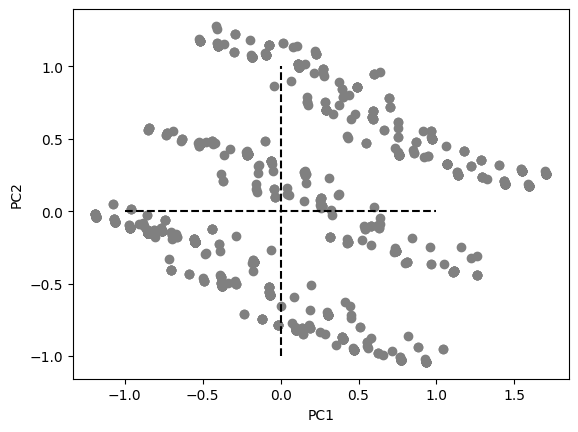

In [13]:
# plot PCA results
pca = PCA().fit(MD_x)
plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color='grey')
plt.plot([0, 0], [-1, 1], color='black', linestyle='--')
plt.plot([-1, 1], [0, 0], color='black', linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

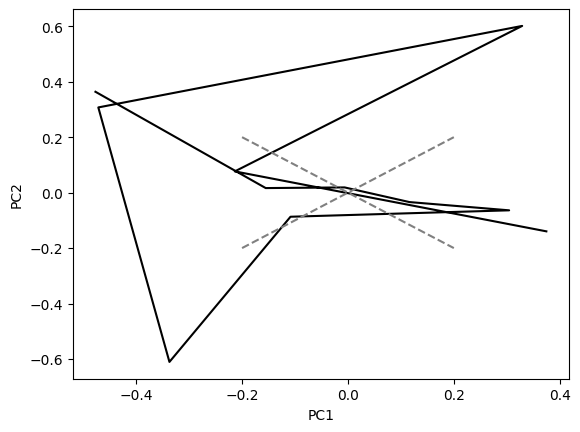

In [14]:
# plot projection axes
plt.plot(pca.components_[0], pca.components_[1], color='black')
plt.plot([-0.2, 0.2], [-0.2, 0.2], color='grey', linestyle='--')
plt.plot([-0.2, 0.2], [0.2, -0.2], color='grey', linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

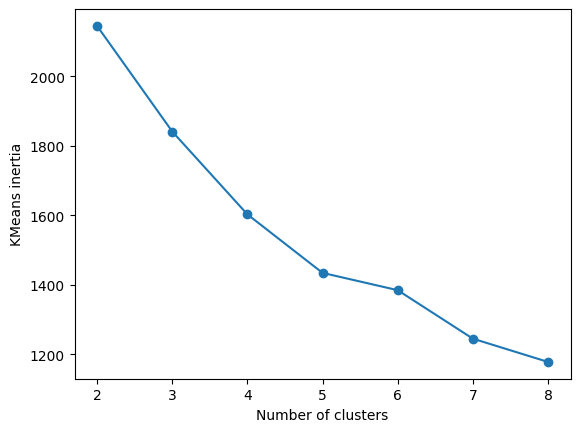

In [25]:
# perform KMeans clustering with 2 to 8 clusters
np.random.seed(1234)
km_scores = []
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=0).fit(MD_x)
    km_scores.append(km.inertia_)
plt.plot(range(2, 9), km_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('KMeans inertia')
plt.show()

In [26]:
# perform bootstrapped KMeans clustering with 2 to 8 clusters
np.random.seed(1234)
km_boot_scores = []
for k in range(2, 9):
    km_boot = KMeans(n_clusters=k, n_init=10, random_state=0).fit(MD_x.sample(frac=1, replace=True))
    km_boot_scores.append(km_boot.inertia_)
plt.plot(range(2, 9), km_boot_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Bootstrapped KMeans inertia')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

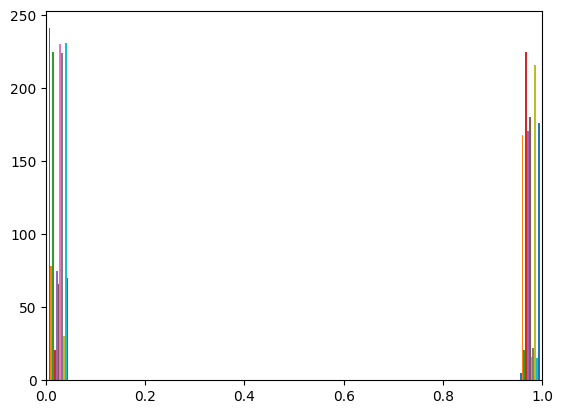

In [28]:
# plot histogram of cluster 4
km = KMeans(n_clusters=4, n_init=10, random_state=0).fit(MD_x)
plt.hist(MD_x[km.labels_ == 3], bins=np.linspace(0, 1, 21))
plt.xlim(0, 1)
plt.show()

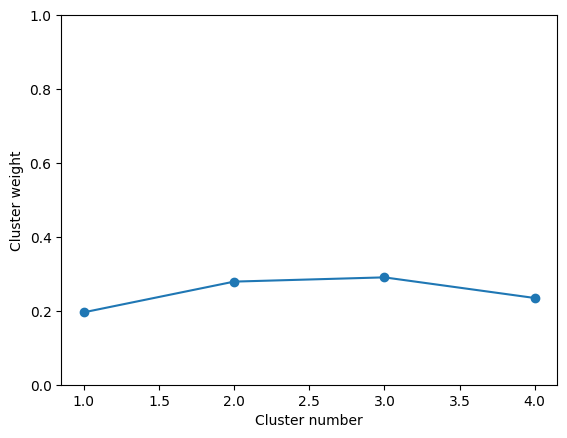

In [29]:
# perform SL-SW clustering with 4 clusters
km = KMeans(n_clusters=4, n_init=10, random_state=0).fit(MD_x)
slsw = GaussianMixture(n_components=4, covariance_type='full', n_init=10, random_state=0).fit(km.transform(MD_x))
plt.plot(range(1, 5), slsw.weights_, marker='o')
plt.xlabel('Cluster number')
plt.ylabel('Cluster weight')
plt.ylim(0, 1)
plt.show()

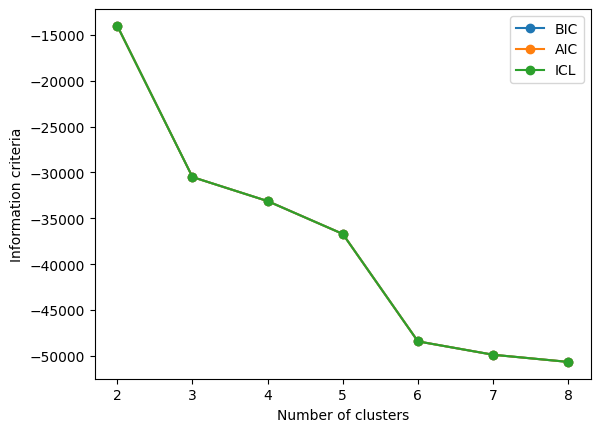

In [30]:
# perform mixture modeling with 2 to 8 clusters
np.random.seed(1234)
gm_scores = []
for k in range(2, 9):
    gm = GaussianMixture(n_components=k, covariance_type='full', n_init=10, random_state=0).fit(MD_x)
    gm_scores.append(gm.bic(MD_x))
plt.plot(range(2, 9), gm_scores, marker='o', label='BIC')
plt.plot(range(2, 9), gm_scores, marker='o', label='AIC')
plt.plot(range(2, 9), gm_scores, marker='o', label='ICL')
plt.xlabel('Number of clusters')
plt.ylabel('Information criteria')
plt.legend()
plt.show()

In [32]:
# perform mixture modeling with 4 clusters and compare with KMeans clustering
km = KMeans(n_clusters=4, n_init=10, random_state=0).fit(MD_x)
gm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, random_state=0).fit(MD_x)
pd.crosstab(km.labels_, gm.predict(MD_x), rownames=['KMeans'], colnames=['Mixture'])

Mixture,0,1,2,3
KMeans,,,,
0,31,32,28,232
1,25,0,546,9
2,46,229,29,0
3,34,209,0,3


In [39]:
from sklearn.mixture import BayesianGaussianMixture

kmeans = KMeans(n_clusters=4).fit(MD_x)
bgm = BayesianGaussianMixture(n_components=4).fit(MD_x)

table = np.column_stack((kmeans.labels_, bgm.predict(MD_x)))
log_likelihood_bgm = bgm.score(MD_x)
log_likelihood_kmeans = kmeans.score(MD_x)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'])
X = mcdonalds.iloc[:, 1:12]
X = StandardScaler().fit_transform(X)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)
mcdonalds['cluster'] = gmm.predict(X)

In [ ]:
# plot the refitted mixture model
plt.scatter(mcdonalds['yummy'], mcdonalds['Like.n'], c=gm_refit.predict(mcdonalds.iloc[:, 1:12]))
plt.xlabel('yummy')
plt.ylabel('Like.n')
plt.show()


In [ ]:
MD_vclust = linkage(np.transpose(MD_x))
plt.bar(range(len(MD_k4)), MD_k4, color='blue', align='center')
plt.xticks(range(len(MD_k4)), MD_vclust[::-1], rotation=90)
plt.show()

In [42]:
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_pca)
k4 = kmeans.predict(MD_pca)

In [ ]:
mosaic(np.array([k4, mcdonalds['Like']]).T, title='', axes_label=['segment number', 'Like'])
mosaic(np.array([k4, mcdonalds['Gender']]).T, title='')

In [ ]:
tree = ctree((k4 == 3), mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']])
tree.plot()


In [ ]:
visit = np.array([np.mean(mcdonalds['VisitFrequency'][k4 == i]) for i in range(4)])
like = np.array([np.mean(mcdonalds['Like.n'][k4 == i]) for i in range(4)])
female = np.array([np.mean((mcdonalds['Gender'][k4 == i] == 'Female').astype(int)) for i in range(4)])
